# Setup

The point of departure comes from work that can be seen [in this blog post](https://medium.com/@crbarahona/mapping-political-rhetoric-5fc03c51895f), where [carlos](https://medium.com/@crbarahona), 
in order to make two flags (USA and Ukraine) with word clouds from a Trump and Zelenskyy's words, 
extracted the audio from the youtube video (using `yt-dlp`), transcribed it (using `whisper`), 
and did speaker identification with `whisperx`. 

I just wanted to take it further and visualize various perspectives of what was said 
(in technical terms, look at various planar projections of the (OpenAI) embeddings of the text segments of the transcript).

In [13]:
from functools import partial
import os 

# settings
raw_src_url = 'https://raw.githubusercontent.com/thorwhalen/content/refs/heads/master/text/trump-zelensky-2025-03-01--with_speakers.txt'
prepped_data_url = 'https://www.dropbox.com/scl/fi/llqdfatppdrbmm3pi6iyd/trump_vs_zelenskyy_transcript.parquet?rlkey=a9gybfibw6msumzv63z6yrqcf&dl=1'

rootdir = './data/trump_vs_zelenskyy/'   # NOTE: Put your own rootdir here

fullpath_of = lambda *paths: os.path.join(os.path.expanduser(rootdir), *paths)
# save keys (e.g. relative paths)
embeddings_save_key = 'trump_vs_zelenskyy_embeddings.parquet'
transcript_save_key = 'trump_vs_zelenskyy_transcript.parquet'

In [2]:
import os
import re
import pandas as pd 
import numpy as np
import requests


In [ ]:
# get from local (if you have it where the key points to)

import tabled 

transcript_df = tabled.get_table(fullpath_of(transcript_save_key))

df = transcript_df
print(f"{transcript_df.shape=}")
transcript_df.iloc[0]

transcript_df.shape=(858, 19)


speaker                             Trump
text           Well, thank you very much.
tsne_x                         -16.044361
tsne_y                          33.261379
lda_x                            0.788964
lda_y                           -0.248835
pca_1                           -0.206804
pca_2                            0.045916
neg                                   0.0
neu                                 0.395
pos                                 0.605
compound                           0.5574
Happy                                 0.0
Angry                                 0.0
Surprise                              0.0
Sad                                   0.0
Fear                                  0.0
turn                                    0
sentiment_f                      0.959465
Name: 0, dtype: object

# Check the prepared data out

In [4]:
prepped_data_url = 'https://www.dropbox.com/scl/fi/llqdfatppdrbmm3pi6iyd/trump_vs_zelenskyy_transcript.parquet?rlkey=a9gybfibw6msumzv63z6yrqcf&dl=1'

In [5]:
import pandas as pd 

transcript_df = pd.read_parquet(prepped_data_url)
print(f"{transcript_df.shape=}")
transcript_df.iloc[0]

transcript_df.shape=(858, 18)


speaker                          Trump
text        Well, thank you very much.
tsne_x                      -16.044361
tsne_y                       33.261379
lda_x                         0.788964
lda_y                        -0.248835
pca_1                        -0.206804
pca_2                         0.045916
neg                                0.0
neu                              0.395
pos                              0.605
compound                        0.5574
Happy                              0.0
Angry                              0.0
Surprise                           0.0
Sad                                0.0
Fear                               0.0
turn                                 0
Name: 0, dtype: object

<Axes: xlabel='lda_x', ylabel='lda_y'>

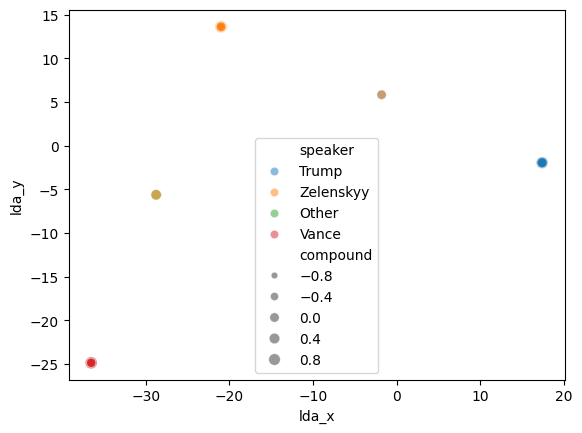

In [47]:
from seaborn import scatterplot

scatterplot(transcript_df, x='lda_x', y='lda_y', hue='speaker', size='compound', alpha=0.5)


<Axes: xlabel='speaker', ylabel='lda_y'>

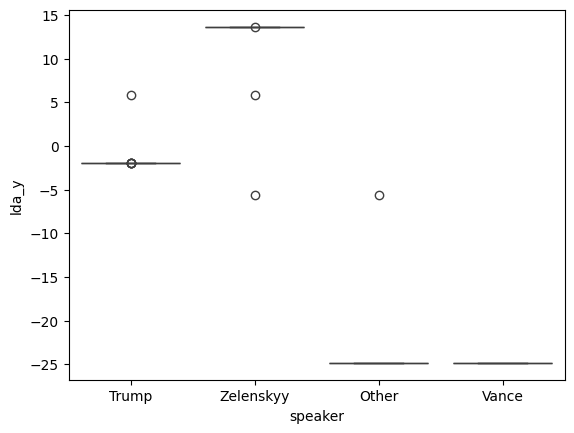

In [49]:
# look at the whisker plot of lda_x and lda_y
from seaborn import boxplot

boxplot(transcript_df, x='speaker', y='lda_y')

In [ ]:
from imbed_data_prep

# Prepare the data

In [1]:
import os
import re
import pandas as pd 
import numpy as np
import requests

import tabled

In [15]:
# settings
raw_src_url = 'https://raw.githubusercontent.com/thorwhalen/content/refs/heads/master/text/trump-zelensky-2025-03-01--with_speakers.txt'

rootdir = './data/trump_vs_zelenskyy/'   # NOTE: Put your own rootdir here

fullpath_of = lambda *paths: os.path.join(os.path.expanduser(rootdir), *paths)

# save keys (e.g. relative paths)
embeddings_save_key = 'trump_vs_zelenskyy_embeddings.parquet'
transcript_save_key = 'trump_vs_zelenskyy_transcript.parquet'

In [16]:
store = tabled.DfFiles(rootdir)

In [17]:
# Get the text of the transcript
transcript_text = requests.get(raw_src_url).text

In [21]:
import pyperclip
pyperclip.copy(transcript_text)


In [5]:
# Every line of transcript_text starts with [speaker]: [text]
# Let's parse the transcript_text to get a list of (speaker, text) dicts
# Define a regex pattern to match the speaker and text
pattern = re.compile(r'\[(?P<speaker>[^\]]+)\]: (?P<text>.*)')

# Parse the transcript_text to get a list of (speaker, text) dicts
transcript_dict_list = [
    match.groupdict()
    for match in pattern.finditer(transcript_text)
]

transcript_df = pd.DataFrame(transcript_dict_list)
transcript_df

,speaker,text
0,Trump,"Well, thank you very much."
1,Trump,It's an honor to have President Zelensky of Uk...
2,Trump,"And we've been working very hard, very close."
3,Trump,So we've actually known each other for a long ...
4,Trump,We've been dealing with each other for a long ...
...,...,...
853,Trump,What do you think?
854,Trump,This is going to be great television.
855,Trump,I will say that.
856,Trump,We'll see what we can do about putting it.


In [6]:
t = transcript_df['speaker'].value_counts()
n_top_speakers = 4
print(f"Unique speakers: {len(t)}")
print(f"Top 5 speakers: {t.head(n_top_speakers)}")

Unique speakers: 15
Top 5 speakers: speaker
Trump         509
Zelenskyy     251
Vance          32
SPEAKER_17      9
Name: count, dtype: int64


In [7]:
# replace all speakers that are not the top 3 with 'Other'
top_speakers = transcript_df['speaker'].value_counts().head(3).index
transcript_df['speaker'] = transcript_df['speaker'].apply(
    lambda speaker: speaker if speaker in top_speakers else 'Other'
)
transcript_df['speaker'].value_counts()  # only 4 unique speakers now

speaker
Trump        509
Zelenskyy    251
Other         66
Vance         32
Name: count, dtype: int64

In [8]:
if embeddings_save_key not in store:
    # compute the embeddings
    import oa
    embeddings_vectors = oa.embeddings(transcript_df['text'])
    embeddings_df = pd.DataFrame({'embeddings': embeddings_vectors})
    store[embeddings_save_key] = embeddings_df
else:
    embeddings_df = store[embeddings_save_key]
    embeddings_vectors = np.vstack(embeddings_df['embeddings'])

In [9]:
# project embeddings to plane using TSNE
if 'tsne_x' not in transcript_df.columns:

    from sklearn.manifold import TSNE
    
    tsne_vectors = TSNE(n_components=2).fit_transform(embeddings_vectors)

    t = pd.DataFrame(tsne_vectors, columns=['tsne_x', 'tsne_y'])
    transcript_df = pd.concat([transcript_df, t], axis=1)

print(f"{transcript_df.shape=}")
transcript_df.iloc[0]

transcript_df.shape=(858, 4)


speaker                         Trump
text       Well, thank you very much.
tsne_x                     -16.044361
tsne_y                      33.261379
Name: 0, dtype: object

In [10]:
# project embeddings to plane using linear discriminant analysis on speakers
if 'lda_x' not in transcript_df.columns:

    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 
    from sklearn.pipeline import Pipeline
    from sklearn.decomposition import PCA

    speakers = transcript_df['speaker']

    pipeline = Pipeline([
        ('pca', PCA(n_components=50)),
        ('lda', LDA(n_components=2))
    ])

    pipeline.fit(embeddings_vectors, y=speakers)
    lda_vectors = pipeline.transform(embeddings_vectors)

    t = pd.DataFrame(lda_vectors, columns=['lda_x', 'lda_y'])
    transcript_df = pd.concat([transcript_df, t], axis=1)

print(f"{transcript_df.shape=}")
transcript_df.iloc[0]

transcript_df.shape=(858, 6)


speaker                         Trump
text       Well, thank you very much.
tsne_x                     -16.044361
tsne_y                      33.261379
lda_x                        0.788964
lda_y                       -0.248835
Name: 0, dtype: object

In [23]:
# project embeddings to plane using linear discriminant analysis on speakers
if 'single_speaker_lda' not in transcript_df.columns:

    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 
    from sklearn.pipeline import Pipeline
    from sklearn.decomposition import PCA

    speakers = transcript_df['speaker']

    pipeline = Pipeline([
        ('pca', PCA(n_components=50)),
        ('lda', LDA(n_components=1))
    ])

    pipeline.fit(embeddings_vectors, y=speakers)
    lda_vectors = pipeline.transform(embeddings_vectors)

    t = pd.DataFrame(lda_vectors, columns=['single_speaker_lda'])
    transcript_df = pd.concat([transcript_df, t], axis=1)

print(f"{transcript_df.shape=}")
transcript_df.iloc[0]

transcript_df.shape=(858, 19)


speaker                                    Trump
text                  Well, thank you very much.
tsne_x                                -16.044361
tsne_y                                 33.261379
lda_x                                   0.788964
lda_y                                  -0.248835
pca_1                                  -0.206804
pca_2                                   0.045916
neg                                          0.0
neu                                        0.395
pos                                        0.605
compound                                  0.5574
Happy                                        0.0
Angry                                        0.0
Surprise                                     0.0
Sad                                          0.0
Fear                                         0.0
turn                                           0
single_speaker_lda                      0.849894
Name: 0, dtype: object

In [11]:
if 'pca_1' not in transcript_df.columns:
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)

    pca_vectors = pca.fit_transform(embeddings_vectors)

    t = pd.DataFrame(pca_vectors, columns=['pca_1', 'pca_2'])
    transcript_df = pd.concat([transcript_df, t], axis=1)

In [300]:
ww = list(map(sentiment_score, transcript_df.iloc[:3]['text']))
ww

[0.9594653844833374, 0.9941986799240112, 0.998121440410614]

In [ ]:
if 'sentiment_f' not in transcript_df.columns:
    from mood.sentiment import flair_sentiment_score

    t = pd.DataFrame(list(map(flair_sentiment_score, transcript_df['text'])), columns=['sentiment_f'])
    transcript_df = pd.concat([transcript_df, t], axis=1)
transcript_df.iloc[0]

speaker                             Trump
text           Well, thank you very much.
tsne_x                         -16.044361
tsne_y                          33.261379
lda_x                            0.788964
lda_y                           -0.248835
pca_1                           -0.206804
pca_2                            0.045916
neg                                   0.0
neu                                 0.395
pos                                 0.605
compound                           0.5574
Happy                                 0.0
Angry                                 0.0
Surprise                              0.0
Sad                                   0.0
Fear                                  0.0
turn                                    0
sentiment_f                      0.959465
Name: 0, dtype: object

In [ ]:
import dol

pickle_store = dol.PickleFiles('.')
models = pickle_store['oa_embeddings_sentiment_models.pickle']

print(f"{list(models)=}")

label = 'anger'
print(f"{list(models[label])=}")
print(f"{models[label]['stats']}")

if 'disgust' not in transcript_df.columns:
    for sentiment, d in models.items():
        model = d['model']
        model.predict()


list(models)=['anger', 'sadness', 'surprise', 'disgust', 'fear']
list(models[label])=['label', 'model', 'stats']

=== Model Performance Statistics ===
Accuracy:  0.8103
Precision: 0.6691
Recall:    0.6964
F1 Score:  0.6825
ROC AUC:   0.8603

Confusion Matrix:
[[812 135]
 [119 273]]

Detailed Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.86      0.86       947
         1.0       0.67      0.70      0.68       392

    accuracy                           0.81      1339
   macro avg       0.77      0.78      0.77      1339
weighted avg       0.81      0.81      0.81      1339


Test Size: 0.2, Random State: 42
Feature Scaling: Applied
Training Time: 2.2221 seconds



In [12]:
if 'compound' not in transcript_df.columns:
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

    analyzer = SentimentIntensityAnalyzer()
    t = pd.DataFrame(list(map(analyzer.polarity_scores, transcript_df['text'])))
    transcript_df = pd.concat([transcript_df, t], axis=1)

print(f"{transcript_df.shape=}")
transcript_df.iloc[0]

transcript_df.shape=(858, 12)


speaker                          Trump
text        Well, thank you very much.
tsne_x                      -16.044361
tsne_y                       33.261379
lda_x                         0.788964
lda_y                        -0.248835
pca_1                        -0.206804
pca_2                         0.045916
neg                                0.0
neu                              0.395
pos                              0.605
compound                        0.5574
Name: 0, dtype: object

In [13]:
if 'Happy' not in transcript_df.columns:
    import text2emotion as te

    t = pd.DataFrame(list(map(te.get_emotion, transcript_df['text'])))
    transcript_df = pd.concat([transcript_df, t], axis=1)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/thorwhalen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/thorwhalen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/thorwhalen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
transcript_df['turn'] = range(len(transcript_df))

In [15]:
print(f"{transcript_df.shape=}")
transcript_df.iloc[0]

transcript_df.shape=(858, 18)


speaker                          Trump
text        Well, thank you very much.
tsne_x                      -16.044361
tsne_y                       33.261379
lda_x                         0.788964
lda_y                        -0.248835
pca_1                        -0.206804
pca_2                         0.045916
neg                                0.0
neu                              0.395
pos                              0.605
compound                        0.5574
Happy                              0.0
Angry                              0.0
Surprise                           0.0
Sad                                0.0
Fear                               0.0
turn                                 0
Name: 0, dtype: object

In [16]:
store[transcript_save_key] = transcript_df

# Scrap

In [24]:
from seaborn import scatterplot

In [22]:
sum(transcript_df.Fear > 0)

276

<Axes: xlabel='tsne_x', ylabel='tsne_y'>

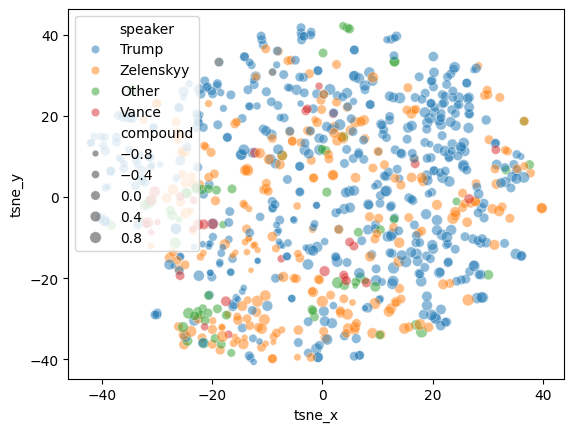

In [ ]:
scatterplot(transcript_df, x='tsne_x', y='tsne_y', hue='speaker', size='compound', alpha=0.5)


<Axes: xlabel='lda_x', ylabel='lda_y'>

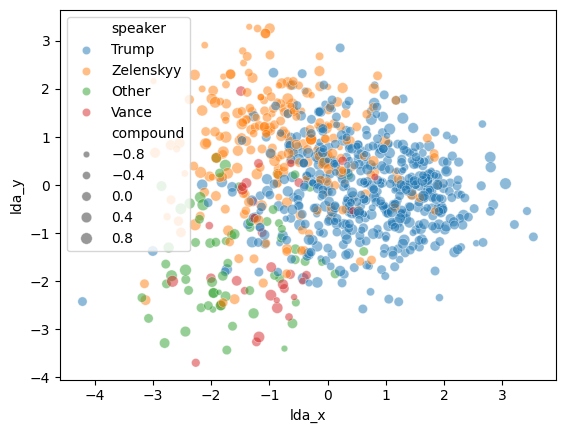

In [ ]:
scatterplot(transcript_df, x='lda_x', y='lda_y', hue='speaker', size='compound', alpha=0.5)

<Axes: xlabel='compound', ylabel='pca_1'>

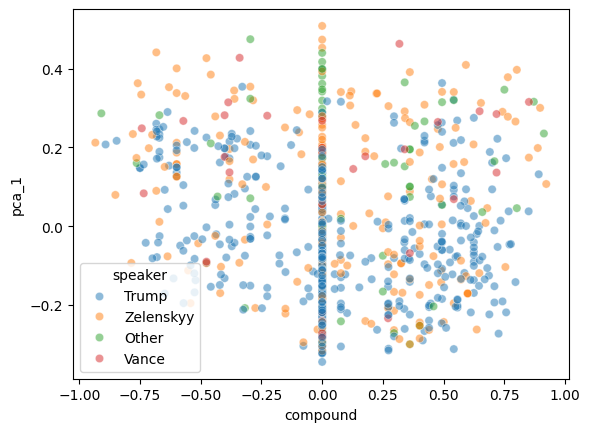

In [ ]:
scatterplot(transcript_df, x='compound', y='pca_1', hue='speaker', alpha=0.5)

<Axes: xlabel='single_speaker_lda', ylabel='compound'>

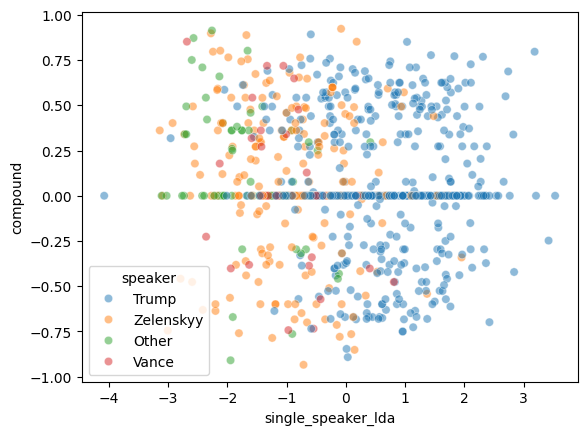

In [26]:

scatterplot(transcript_df, x='single_speaker_lda', y='compound', hue='speaker', alpha=0.5)

<Axes: xlabel='speaker', ylabel='lda_x'>

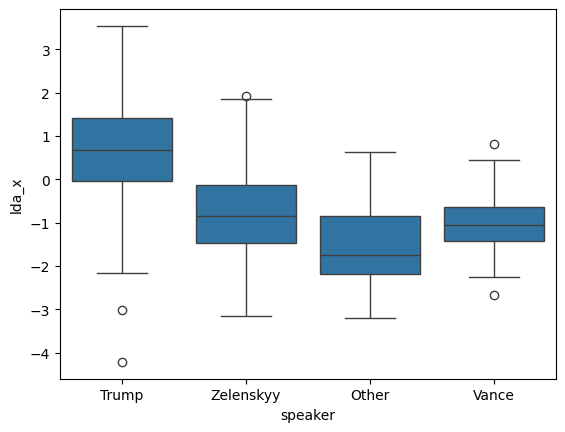

In [26]:
# look at the whisker plot of lda_x and lda_y

from seaborn import boxplot

boxplot(transcript_df, x='speaker', y='lda_x')

<Axes: xlabel='speaker', ylabel='lda_y'>

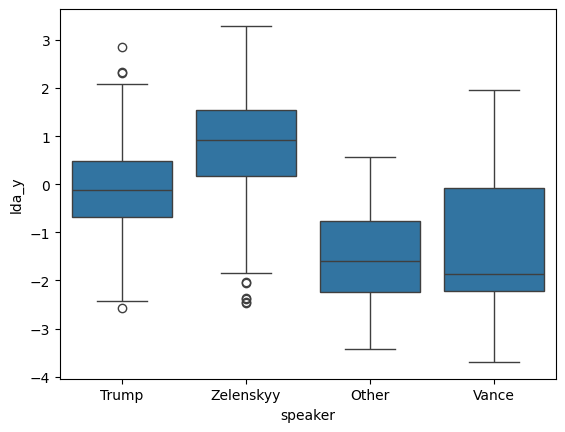

In [28]:
boxplot(transcript_df, x='speaker', y='lda_y')

## Sentiment Regression

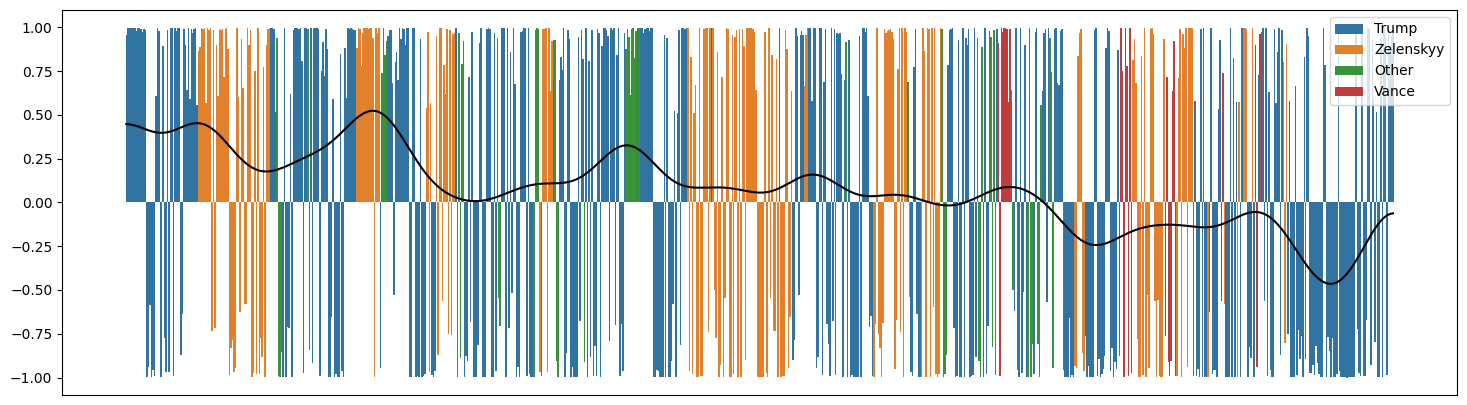

In [343]:
from oplot.sequences import bars 

ax = bars(transcript_df, 'sentiment_f', hue='speaker', density_line=True)

In [ ]:
# most negative sentences
transcript_df.sort_values(by='sentiment_f', ascending=True).iloc[:10][['speaker', 'text', 'sentiment_f']]

,speaker,text,sentiment_f
826,Trump,It was disgusting.,-0.999987
368,Trump,And that's a real mess also that we hope to be...,-0.999984
654,Trump,I'm not aligned with anybody.,-0.999974
143,Trump,And what the Biden administration did was terr...,-0.999967
363,Trump,They were stone cold broke.,-0.999944
485,Trump,I didn't think we were going to make a deal.,-0.999942
241,Trump,"Many times, the only thing stopping those bull...",-0.999935
653,Trump,I'm not aligned with Putin.,-0.999934
565,Trump,So he had to suffer through that.,-0.999934
639,Trump,"You know, you ought to focus on CNN and surviv...",-0.999931


In [336]:
# get rows where 'thank' is included in text
t = transcript_df[transcript_df['text'].str.contains('thank')][['speaker', 'text']]
print(t.to_string())


       speaker                                                                                                                                                                                        text
0        Trump                                                                                                                                                                  Well, thank you very much.
95   Zelenskyy                                                                                                                                          I wanted to show you this, so thank you very much.
260      Trump                                                                                                                                 So I hope I'm going to thank you, Brian, for that question.
340      Other                                                                                                                                                                   Mr. Preside

In [43]:
transcript_df = store[transcript_save_key]
transcript_df.iloc[0]

speaker                          Trump
text        Well, thank you very much.
tsne_x                      -16.044361
tsne_y                       33.261379
lda_x                         0.788964
lda_y                        -0.248835
pca_1                        -0.206804
pca_2                         0.045916
neg                                0.0
neu                              0.395
pos                              0.605
compound                        0.5574
Happy                              0.0
Angry                              0.0
Surprise                           0.0
Sad                                0.0
Fear                               0.0
turn                                 0
Name: 0, dtype: object

In [41]:
def print_some_stats(col, transcript_df=transcript_df):
    'Angry'
    print(f"{sum(transcript_df[col] > 0)=}")
    print(f"{len(transcript_df)=}\n")
    print(f"{transcript_df[col].value_counts()}\n")
    print(transcript_df[col].describe())

print_some_stats('Angry')

sum(transcript_df[col] > 0)=38
len(transcript_df)=858

Angry
0.00    820
1.00     15
0.50     10
0.33      5
0.25      2
0.67      2
0.14      1
0.20      1
0.12      1
0.17      1
Name: count, dtype: int64

count    858.000000
mean       0.028112
std        0.146894
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Angry, dtype: float64


In [42]:
print_some_stats('Fear')

sum(transcript_df[col] > 0)=276
len(transcript_df)=858

Fear
0.00    582
1.00    162
0.50     64
0.33     16
0.67     16
0.75      6
0.25      4
0.20      3
0.43      1
0.12      1
0.60      1
0.38      1
0.14      1
Name: count, dtype: int64

count    858.000000
mean       0.253811
std        0.398540
min        0.000000
25%        0.000000
50%        0.000000
75%        0.500000
max        1.000000
Name: Fear, dtype: float64


In [154]:
sentiment_cols = df.columns[8:-1]
sentiment_cols

Index(['neg', 'neu', 'pos', 'compound', 'Happy', 'Angry', 'Surprise', 'Sad',
       'Fear'],
      dtype='object')

<Axes: >

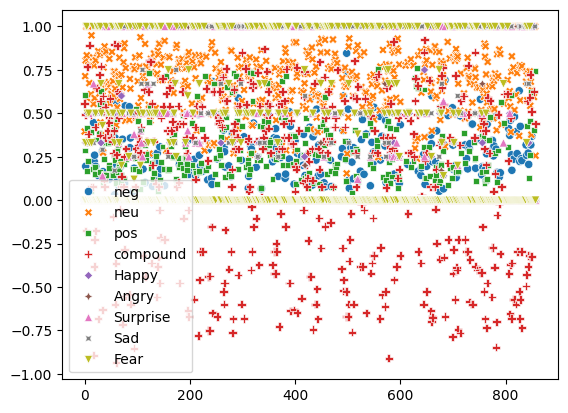

In [153]:
sns.scatterplot(df[df.columns[8:-1]])

## Learning sentiment from embeddings

In [ ]:
transcript_df = store[transcript_save_key]
embeddings_df = store[embeddings_save_key]
df = transcript_df  # alias

In [344]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

def train_model(X, y, weight_non_zero=9):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create sample weights for training set
    sample_weight_train = np.ones(len(y_train))
    non_zero_indices_train = np.where(y_train != 0)[0]
    sample_weight_train[non_zero_indices_train] = weight_non_zero
    
    # Tune alpha using GridSearchCV
    param_grid = {'alpha': [0.1, 1, 10, 100, 1000]}
    grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
    grid_search.fit(X_train, y_train, sample_weight=sample_weight_train)
    best_model = grid_search.best_estimator_
    
    # Predict on test set
    y_pred = best_model.predict(X_test)
    
    # Evaluate the model
    mse_total = mean_squared_error(y_test, y_pred)
    mse_zero = mean_squared_error(y_test[y_test == 0], y_pred[y_test == 0])
    mse_non_zero = mean_squared_error(y_test[y_test != 0], y_pred[y_test != 0])
    
    print(f"Total MSE: {mse_total}")
    print(f"MSE for zero samples: {mse_zero}")
    print(f"MSE for non-zero samples: {mse_non_zero}")
    
    return best_model, y_pred


In [ ]:
import numpy as np 

if 'embeddings_df' not in locals():
    import tabled 
    embeddings_df = tabled.get_table(fullpath_of(embeddings_save_key))

X = np.vstack(tuple(x[0] for x in embeddings_df.values))  # TODO: Find more efficient way

In [62]:
transcript_df.iloc[0]

speaker                          Trump
text        Well, thank you very much.
tsne_x                      -16.044361
tsne_y                       33.261379
lda_x                         0.788964
lda_y                        -0.248835
pca_1                        -0.206804
pca_2                         0.045916
neg                                0.0
neu                              0.395
pos                              0.605
compound                        0.5574
Happy                              0.0
Angry                              0.0
Surprise                           0.0
Sad                                0.0
Fear                               0.0
turn                                 0
Name: 0, dtype: object

In [ ]:
def mean_sentiment_scores(sentiments, transcript_df=transcript_df):
    if isinstance(sentiments, str):
        sentiments = [sentiments]

    return transcript_df[sentiments].mean(axis=1).to_numpy()

# y = mean_sentiment_scores(['neg'])  # ['compound'], ['neg'], ['Angry', 'Fear', 'Sad']
y = transcript_df['sentiment_f']
y.shape



(858,)

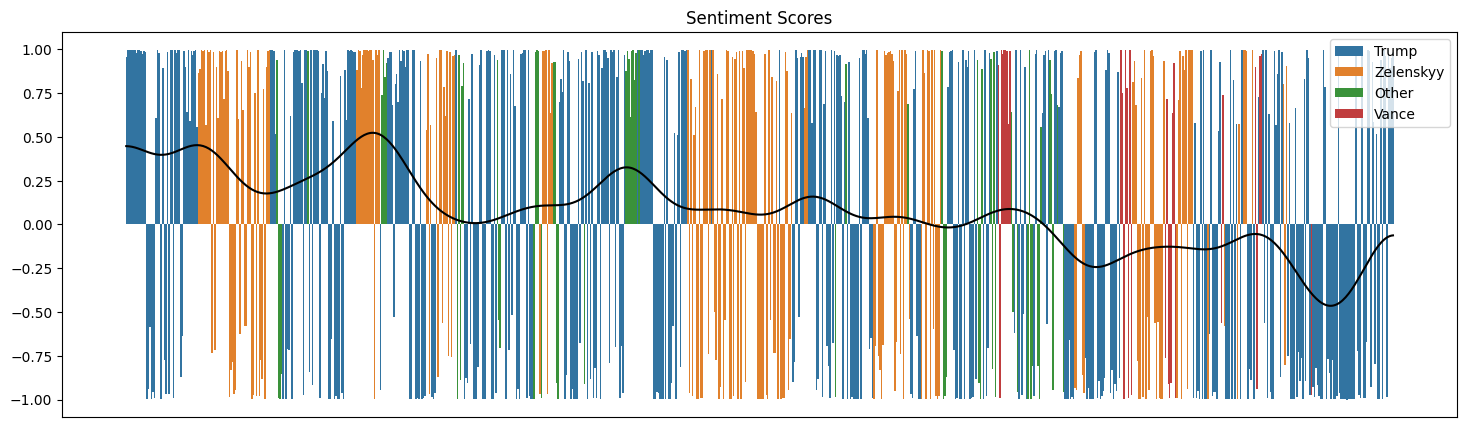

In [347]:
from oplot.sequences import bars 

ax = bars(df, 'sentiment_f', hue='speaker', title='Sentiment Scores', density_line=True)

<Axes: >

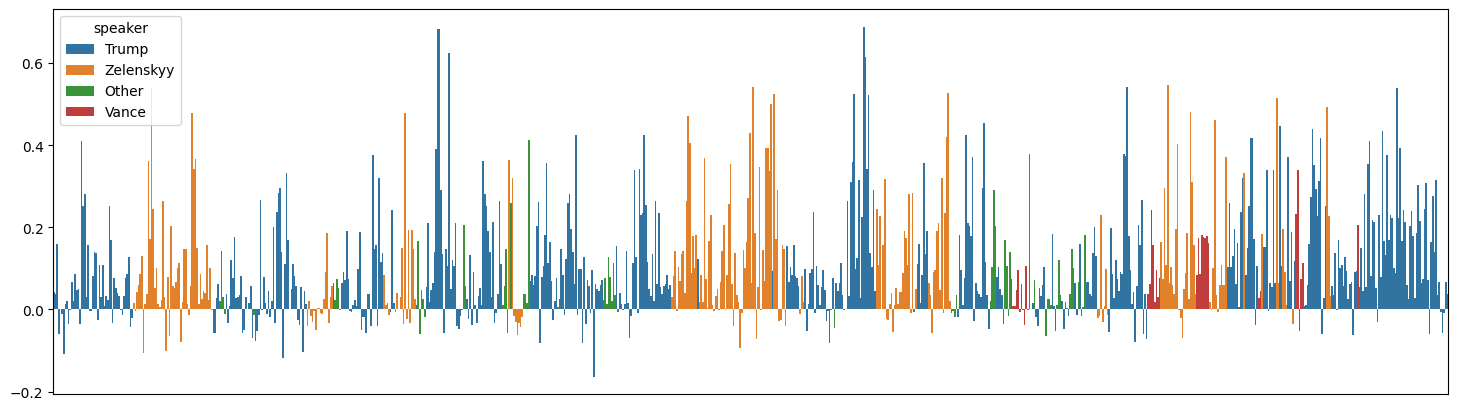

In [285]:
# plot_barplot_with_smooth_line(y_pred)
bars(y_pred, data=df, hue='speaker')


,speaker,text,neg
60,Zelenskyy,At the very beginning of war because he is a k...,0.568
77,Zelenskyy,more in the prison.,0.543
85,Zelenskyy,"You know, bad things.",0.538
236,Trump,There's been a vicious war.,0.681
237,Trump,There's been a vicious war.,0.681
243,Trump,It's dead level.,0.683
292,Other,There's no peace.,0.588
390,Zelenskyy,25 times he broken.,0.508
430,Zelenskyy,He hates Ukrainians.,0.592
441,Zelenskyy,Who began those pain.,0.524


In [349]:
def train_model(X, y, weight_non_zero=9):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create sample weights for training set
    sample_weight_train = np.ones(len(y_train))
    non_zero_indices_train = np.where(y_train != 0)[0]
    sample_weight_train[non_zero_indices_train] = weight_non_zero
    
    # Tune alpha using GridSearchCV
    param_grid = {'alpha': [0.1, 1, 10, 100, 1000]}
    grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
    grid_search.fit(X_train, y_train, sample_weight=sample_weight_train)
    best_model = grid_search.best_estimator_
    
    # Predict on test set
    y_pred = best_model.predict(X_test)
    
    # Evaluate the model
    mse_total = mean_squared_error(y_test, y_pred)
    mse_zero = mean_squared_error(y_test[y_test == 0], y_pred[y_test == 0])
    mse_non_zero = mean_squared_error(y_test[y_test != 0], y_pred[y_test != 0])
    
    print(f"Total MSE: {mse_total}")
    print(f"MSE for zero samples: {mse_zero}")
    print(f"MSE for non-zero samples: {mse_non_zero}")
    
    return best_model, y_pred


# model, y_pred = train_model(X, y)


In [ ]:
# Example usage
weight_non_zero = 1
model, y_test_pred = train_model(X, y, weight_non_zero)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Total MSE: 0.011092534961389821
MSE for zero samples: 0.009507529345626799
MSE for non-zero samples: 0.015434072082827661


In [355]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, SGDRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import time

def train_sentiment_model(X, y, random_state=42, verbose=True):
    """
    Train a sentiment prediction model using semantic embedding vectors.
    
    Parameters:
    -----------
    X : array-like, shape (n_samples, n_features)
        The semantic embedding vectors.
    y : array-like, shape (n_samples,)
        The sentiment scores between -1 and 1.
    random_state : int, default=42
        Random state for reproducibility.
    verbose : bool, default=True
        Whether to print progress and results.
        
    Returns:
    --------
    best_model : estimator
        The best trained model fit on all data.
    y_pred : array-like, shape (n_samples,)
        Predictions on the input data.
    model_performance : dict
        Performance metrics on the test set.
    """
    if verbose:
        print("Starting sentiment model training process...")
        print(f"Input data shape: X: {X.shape}, y: {len(y)}")
    
    # Train-test split for evaluation
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=random_state
    )
    
    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Define models to evaluate
    models = {
        'Ridge': {
            'model': Ridge(),
            'params': {
                'alpha': [0.1, 1.0, 10.0, 100.0],
                'solver': ['auto', 'svd', 'cholesky', 'lsqr']
            }
        },
        'SVR': {
            'model': SVR(),
            'params': {
                'C': [0.1, 1.0, 10.0],
                'epsilon': [0.01, 0.1, 0.2],
                'kernel': ['linear', 'rbf']
            }
        },
        'SGDRegressor': {
            'model': SGDRegressor(random_state=random_state),
            'params': {
                'alpha': [0.0001, 0.001, 0.01],
                'loss': ['squared_error', 'huber', 'epsilon_insensitive'],
                'penalty': ['l2', 'l1', 'elasticnet']
            }
        },
        # 'RandomForest': {
        #     'model': RandomForestRegressor(random_state=random_state),
        #     'params': {
        #         'n_estimators': [50, 100],
        #         'max_depth': [None, 10, 20],
        #         'min_samples_split': [2, 5]
        #     }
        # },
        # 'GradientBoosting': {
        #     'model': GradientBoostingRegressor(random_state=random_state),
        #     'params': {
        #         'n_estimators': [50, 100],
        #         'learning_rate': [0.01, 0.1],
        #         'max_depth': [3, 5]
        #     }
        # }
    }
    
    results = []
    
    # Train and evaluate each model
    for model_name, model_info in models.items():
        if verbose:
            print(f"\nTraining {model_name}...")
            start_time = time.time()
        
        # Grid search with cross-validation
        grid_search = GridSearchCV(
            model_info['model'],
            model_info['params'],
            cv=5,
            scoring='neg_mean_squared_error',
            n_jobs=-1 if model_name != 'SVR' else 1  # SVR can be slow with parallel jobs
        )
        
        grid_search.fit(X_train_scaled, y_train)
        
        # Get best model and make predictions
        best_model = grid_search.best_estimator_
        y_pred_test = best_model.predict(X_test_scaled)
        
        # Calculate metrics
        mse = mean_squared_error(y_test, y_pred_test)
        mae = mean_absolute_error(y_test, y_pred_test)
        r2 = r2_score(y_test, y_pred_test)
        
        results.append({
            'model': model_name,
            'best_params': grid_search.best_params_,
            'mse': mse,
            'mae': mae,
            'r2': r2
        })
        
        if verbose:
            training_time = time.time() - start_time
            print(f"  Best parameters: {grid_search.best_params_}")
            print(f"  MSE: {mse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}")
            print(f"  Training time: {training_time:.2f} seconds")
    
    # Find best model based on MSE
    results_df = pd.DataFrame(results)
    best_model_idx = results_df['mse'].idxmin()
    best_model_name = results_df.loc[best_model_idx, 'model']
    best_model_params = results_df.loc[best_model_idx, 'best_params']
    
    if verbose:
        print("\n" + "="*50)
        print(f"Best model: {best_model_name}")
        print(f"Best parameters: {best_model_params}")
        print(f"Test MSE: {results_df.loc[best_model_idx, 'mse']:.4f}")
        print(f"Test MAE: {results_df.loc[best_model_idx, 'mae']:.4f}")
        print(f"Test R²: {results_df.loc[best_model_idx, 'r2']:.4f}")
        print("="*50)
        print("\nTraining final model on all data...")
    
    # Train best model on all data
    final_model_class = models[best_model_name]['model'].__class__
    final_model = final_model_class(**best_model_params)
    
    # Scale all data
    X_all_scaled = scaler.fit_transform(X)
    
    # Train final model
    final_model.fit(X_all_scaled, y)
    
    # Generate predictions
    y_pred = final_model.predict(X_all_scaled)
    
    # Return final model, predictions, and performance metrics
    model_performance = {
        'model_name': best_model_name,
        'best_params': best_model_params,
        'test_mse': results_df.loc[best_model_idx, 'mse'],
        'test_mae': results_df.loc[best_model_idx, 'mae'],
        'test_r2': results_df.loc[best_model_idx, 'r2'],
        'scaler': scaler  # Including the scaler for future preprocessing
    }
    
    if verbose:
        print("Final model trained successfully.")
    
    return final_model, y_pred, model_performance

# Train the sentiment model
y = transcript_df['sentiment_f'].values
model, y_pred, model_performance = train_sentiment_model(X, y, verbose=True)

Starting sentiment model training process...
Input data shape: X: (858, 1536), y: 858

Training Ridge...
  Best parameters: {'alpha': 100.0, 'solver': 'svd'}
  MSE: 0.5794, MAE: 0.5939, R²: 0.3224
  Training time: 3.92 seconds

Training SVR...
  Best parameters: {'C': 1.0, 'epsilon': 0.01, 'kernel': 'rbf'}
  MSE: 0.3846, MAE: 0.4863, R²: 0.5502
  Training time: 12.43 seconds

Training SGDRegressor...
  Best parameters: {'alpha': 0.01, 'loss': 'huber', 'penalty': 'l1'}
  MSE: 0.4450, MAE: 0.5519, R²: 0.4796
  Training time: 2.16 seconds

Best model: SVR
Best parameters: {'C': 1.0, 'epsilon': 0.01, 'kernel': 'rbf'}
Test MSE: 0.3846
Test MAE: 0.4863
Test R²: 0.5502

Training final model on all data...
Final model trained successfully.


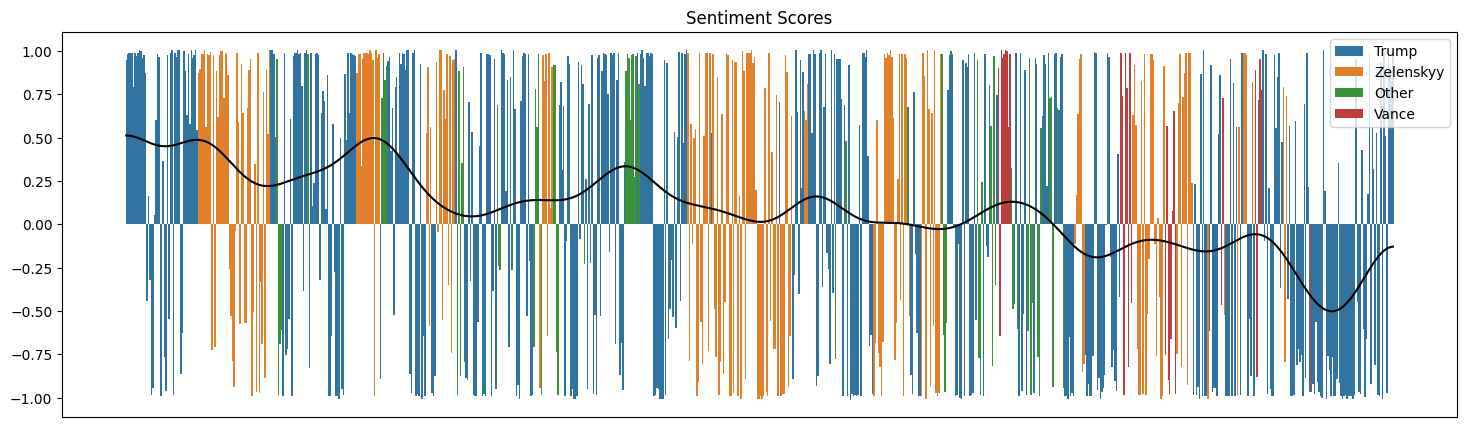

In [356]:
# bars(y_pred, data=df, hue='speaker')
ax = bars(df, y_pred, hue='speaker', title='Sentiment Scores', density_line=True)

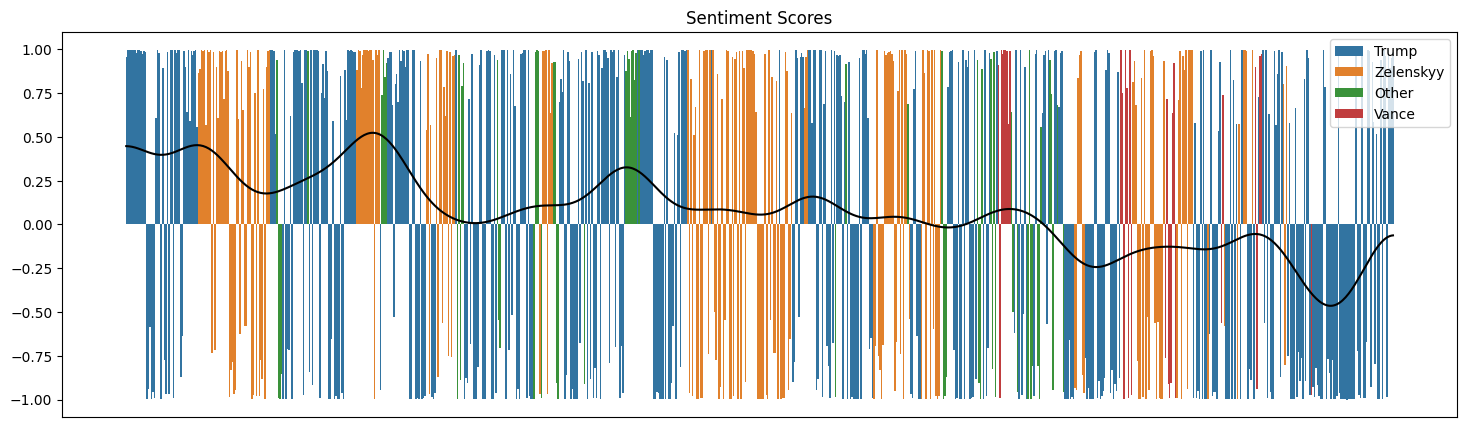

In [357]:
ax = bars(df, y, hue='speaker', title='Sentiment Scores', density_line=True)

In [8]:
import dol

pickle_store = dol.PickleFiles('.')
models = pickle_store['oa_embeddings_sentiment_models.pickle']

list(models)

['anger', 'sadness', 'surprise', 'disgust', 'fear']

In [9]:

from operator import attrgetter
import pandas as pd 

stats_names = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

f = lambda label: dict(
    zip(stats_names, attrgetter(*stats_names)(models[label]['stats']))
)
t = pd.DataFrame(map(f, models))
t.index = models
t

,accuracy,precision,recall,f1,roc_auc
anger,0.864824,0.826625,0.681122,0.746853,0.924268
sadness,0.905900,0.864469,0.726154,0.789298,0.952808
surprise,0.932039,0.895928,0.744361,0.813142,0.962890
disgust,0.879761,0.714286,0.344828,0.465116,0.884301
fear,0.938760,0.898876,0.522876,0.661157,0.963289


In [15]:
label = 'anger'

model = models[label]['model']
t = model.predict_proba(X)[:, 1]
df.iloc[np.argsort(t)[::-1]].iloc[:20][['speaker', 'text']]


,speaker,text
685,Zelenskyy,He killed people.
428,Zelenskyy,"He hates us, you know?"
778,Trump,"Then you tell us, I don't want to cease fire."
779,Trump,I don't want to cease fire.
660,Trump,He's got tremendous hatred.
430,Zelenskyy,He hates Ukrainians.
58,Zelenskyy,And you said that enough with the war.
438,Zelenskyy,This is the rule of the war.
439,Zelenskyy,This is the rule of the war.
60,Zelenskyy,At the very beginning of war because he is a k...


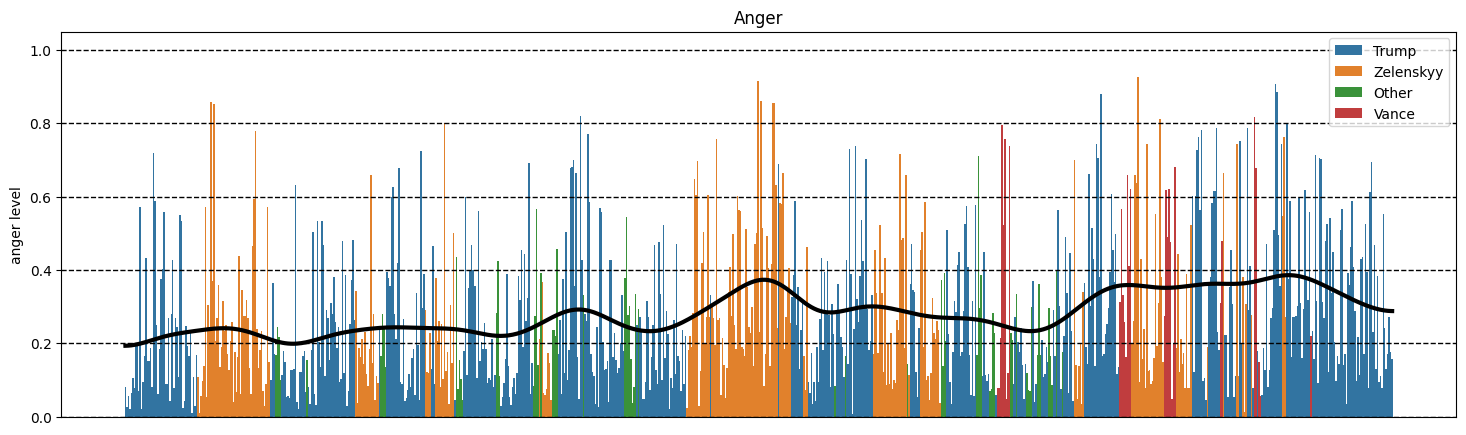

In [16]:
from oplot.sequences import bars

# embeddings_df
# label = 'anger'
# model = models[label]['model']
# t = model.predict_proba(X)[:, 1]
ax = bars(
    df, t, hue='speaker', title='Anger', y_label='anger level', density_line=3
)
# add horizontal lines at the location of the y ticks, across the whole plot
ytick_locs = ax.get_yticks()
for ytick_loc in ytick_locs:
    ax.axhline(ytick_loc, color='black', linestyle='--', linewidth=1);


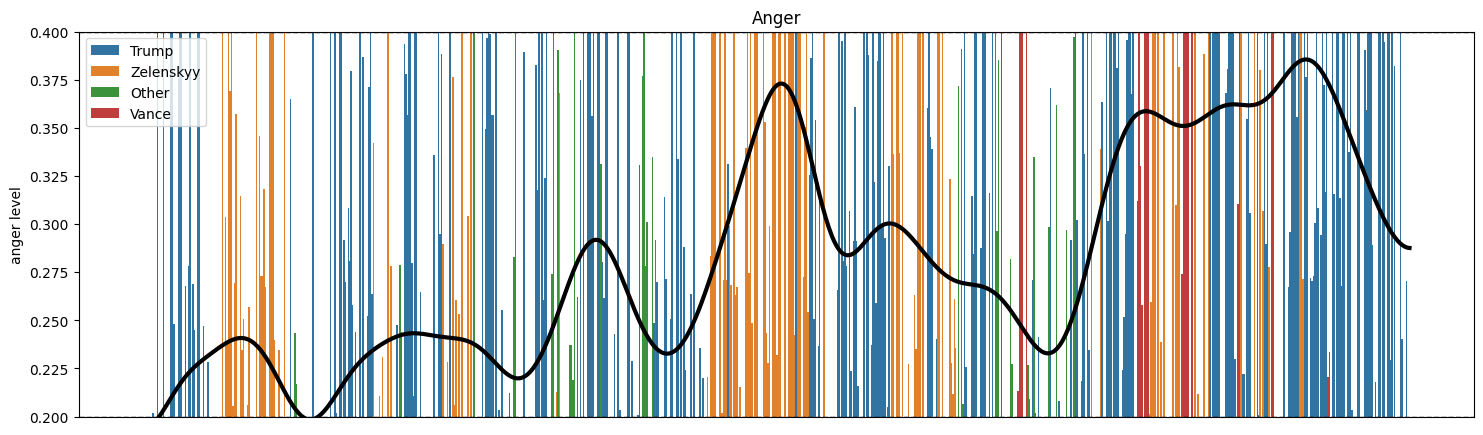

In [17]:
from oplot.sequences import bars

ax = bars(
    df, t, hue='speaker', title='Anger', y_label='anger level', density_line=3
)
# add horizontal lines at the location of the y ticks, across the whole plot
ytick_locs = ax.get_yticks()
for ytick_loc in ytick_locs:
    ax.axhline(ytick_loc, color='black', linestyle='--', linewidth=1);
# change the y axis limits to 0.2-0.4
ax.set_ylim(0.2, 0.4);

In [384]:
print(label)
tt = df.copy()
tt[label] = t 
tt.sort_values(by=label, ascending=False).iloc[:15][['speaker', 'text', label]]

anger


,speaker,text,anger
428,Zelenskyy,"He hates us, you know?",0.007300
60,Zelenskyy,At the very beginning of war because he is a k...,0.006830
149,Trump,But,0.006608
710,Vance,And do you think that it's respectful to come ...,0.006401
737,Trump,You're gambling with World War III.,0.006367
736,Trump,You're gambling with World War III.,0.006367
786,Trump,Because you'll get a ceasefire faster than any...,0.006334
400,Zelenskyy,accept just his fire.,0.006259
308,Trump,Quickly.,0.006250
685,Zelenskyy,He killed people.,0.006228


In [ ]:
import mood

In [172]:
y_pred = model.predict(X)

In [173]:
print(f"{sum(y > 0)=}")
print(f"{sum(y_pred > 0)=}")

sum(y > 0)=239
sum(y_pred > 0)=689


In [174]:
import seaborn as sns 

<Axes: >

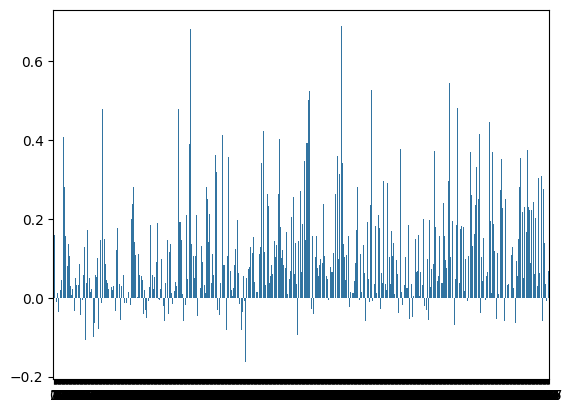

In [176]:
sns.barplot(y_pred)

{'price_per_million_tokens': 0.02,
 'pages_per_dollar': 62500,
 'performance_on_mteb_eval': 62.3,
 'max_input': 8191}

<Axes: ylabel='neg'>

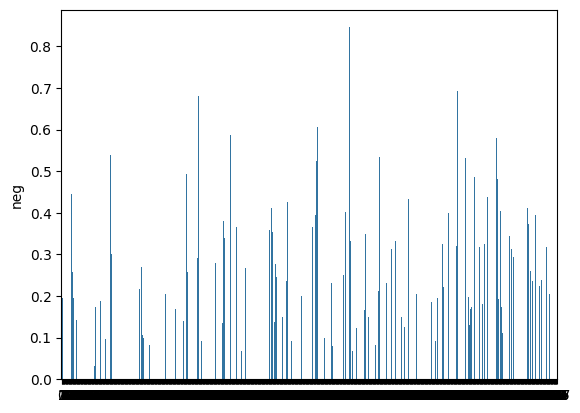

In [ ]:
sns.barplot(df.neg)

<Axes: ylabel='pos'>

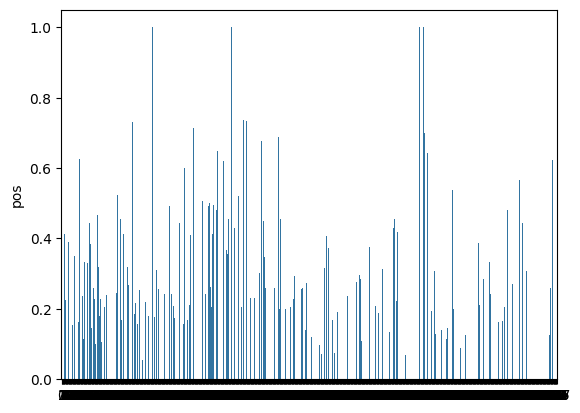

In [160]:
sns.barplot(df.pos)

<Axes: ylabel='compound'>

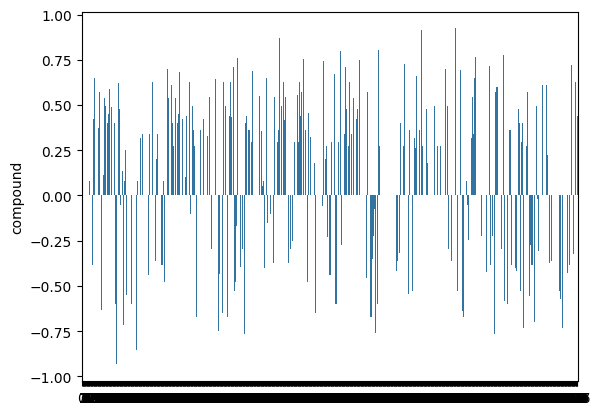

In [162]:
sns.barplot(df.compound)

<Axes: >

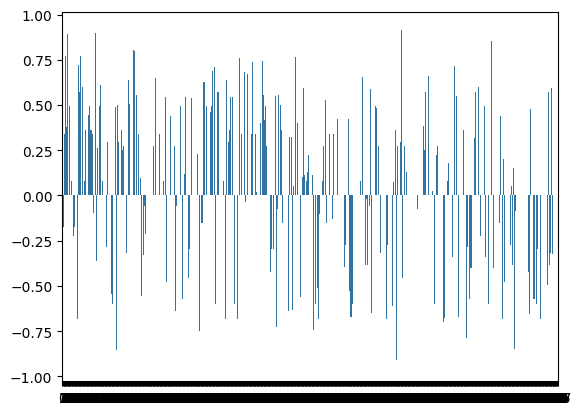

In [140]:
sns.barplot(y)

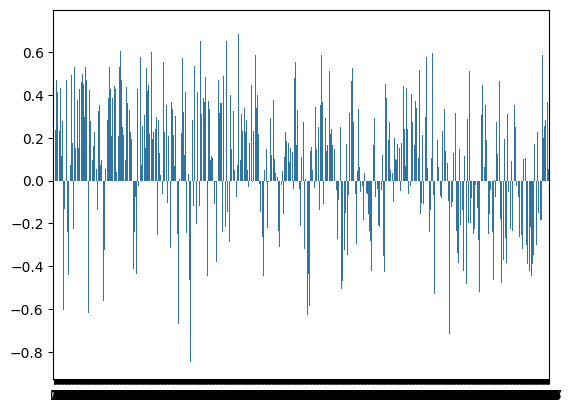

In [141]:
sns.barplot(y_pred);

<Axes: >

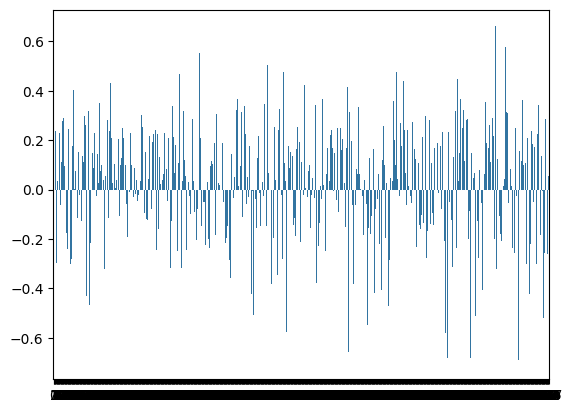

In [148]:
# differences between target sentiment score and embedding-base score

sns.barplot(y_pred - y)

<Axes: >

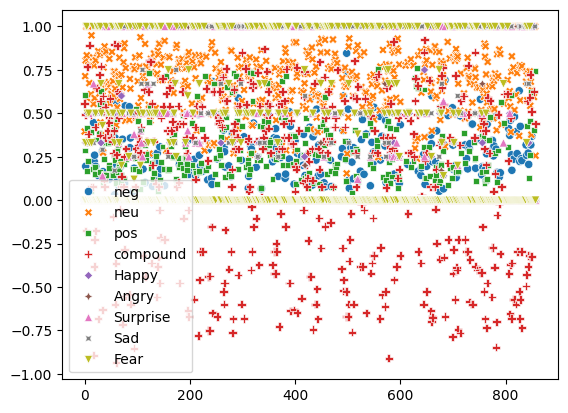

In [152]:
df = transcript_df 

sns.scatterplot(df[df.columns[8:-1]])

In [80]:
def string_to_numeric_array(input_array):
    mapping = {}
    counter = 0
    result = []
    for s in input_array:
        if s not in mapping:
            mapping[s] = counter
            counter += 1
        result.append(mapping[s])
    return result

speaker_ids = string_to_numeric_array(transcript_df.speaker.values)

In [97]:
mapping.tolist()

['Trump', 'Zelenskyy', 'Other', 'Vance']

In [100]:
import seaborn as sns 

speaker_ids, mapping = pd.array(transcript_df.speaker).factorize()
colors = sns.color_palette(n_colors=len(mapping))

mapping

<NumpyExtensionArray>
['Trump', 'Zelenskyy', 'Other', 'Vance']
Length: 4, dtype: object

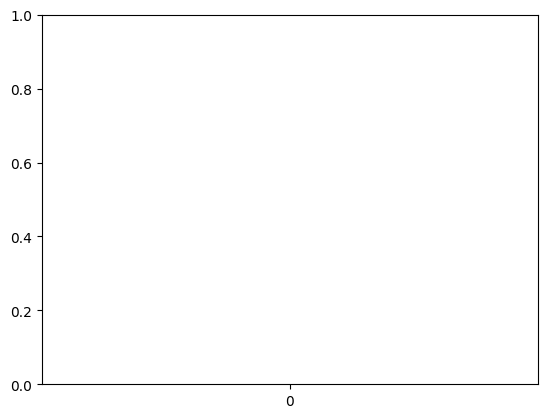

In [ ]:
y_pred = model.predict(X)
plot_colors = [colors[i] for i in speaker_ids]
sns.barplot(y - y_pred, color=plot_colors)

# The Dacc

In [7]:
from imbed_data_prep.trump_vs_zelenskyy import TrumpZelenskyyDacc

dacc = TrumpZelenskyyDacc()


In [9]:
list(dacc.store)

['wildchat.ipynb',
 'embeddings_and_order.ipynb',
 'ai_prompts.ipynb',
 'trump_vs_zelenskyy.ipynb',
 'trump_vs_zelensky.md',
 'using_ai_to_get_data_descriptions.ipynb',
 'jersey_laws.ipynb',
 'twitter_sentiment.ipynb',
 'ultra_chat.ipynb',
 'github_repos.ipynb',
 'various_data_preps.ipynb',
 'data/trump_vs_zelenskyy_transcript.parquet',
 'data/trump_vs_zelenskyy_embeddings.parquet',
 'data/cheat_sheets/Scikit-Learn Cheat Sheet: Python Machine Learning.pdf',
 'data/cheat_sheets/Machine Learning and Data Science Cheat Sheet.pdf',
 'data/cheat_sheets/Machine Learning Cheat Sheet.pdf',
 'data/cheat_sheets/Data Science Cheatsheet.pdf',
 'data/cheat_sheets/The Complete Collection of Data Science Cheat Sheets.pdf',
 'data/cheat_sheets/Scikit-Learn CheatSheet: Python Machine Learning Tutorial.pdf',
 'data/cheat_sheets/Scikit-Learn Cheat Sheet for Machine Learning.pdf',
 'data/cheat_sheets/Data Science Cheat Sheets.pdf',
 'data/cheat_sheets/ML Cheatsheet Documentation.pdf',
 'data/cheat_sheets/